In [2]:
import numpy as numpy
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
import csv

In [3]:
#load file
data = numpy.genfromtxt('data.csv', delimiter=',')

with open('data.csv', 'r') as file:
    reader = csv.reader(file)
    header = next(reader)
    
    data = list(reader)
    
    size_index = header.index('tumor-size')
    uncleaned_size_data = [row[size_index] for row in data]
    
    diagnosis_index = header.index('diagnosis')
    uncleaned_diagnosis_data = [row[diagnosis_index] for row in data]
    
#print(uncleaned_size_data)
# print('------------------------------')
# print(uncleaned_diagnosis_data)
# print(len(uncleaned_size_data))
# print(len(uncleaned_diagnosis_data))

['15-19', '15-19', '35-39', '35-39', '30-34', '25-29', '40-44', '14-Oct', '0-4', '40-44', '25-29', '15-19', '30-34', '25-29', '25-29', '20-24', '14-Oct', '15-19', '40-44', '20-24', '20-24', '40-44', '15-19', '14-Oct', '15-19', '20-24', '14-Oct', '14-Oct', '30-34', '15-19', '30-34', '25-29', '25-29', '20-24', '30-34', '15-19', '14-Oct', '45-49', '20-24', '14-Oct', '35-39', '35-39', '25-29', '20-24', '15-19', '30-34', '14-Oct', '35-39', '50-54', '40-44', '15-19', '30-34', '0-4', '40-44', '25-29', '25-29', '20-24', '35-39', '50-54', '0-4', '40-44', '30-34', '20-24', '30-34', '20-24', '15-19', '25-29', '15-19', '50-54', '14-Oct', '25-29', '25-29', '14-Oct', '30-34', '25-29', '14-Oct', '15-19', '25-29', '25-29', '30-34', '15-19', '25-29', '30-34', '15-19', '0-4', '35-39', '40-44', '25-29', '20-24', '30-34', '20-24', '30-34', '20-24', '14-Oct', '20-24', '45-49', '40-44', '14-Oct', '30-34', '35-39', '20-24', '15-19', '30-34', '20-24', '20-24', '30-34', '20-24', '25-29', '30-34', '20-24', '15-

In [3]:
#isolate longest measurement
new_size_data = uncleaned_size_data
index = 0

for datum in uncleaned_size_data:
    entry = new_size_data[index]
    entry = entry[3:5]
    new_size_data[index] = entry
    index = index + 1
# print(new_size_data)

In [4]:
#clean data
size_data = []
diagnosis_data = []
index2 = 0

for datum in new_size_data:
    if datum != '' and not datum[:1].isalpha():
        size_data.append(new_size_data[index2])
        diagnosis_data.append(uncleaned_diagnosis_data[index2])
    index2 = index2 + 1

# print(size_data)

In [5]:
#convert both data sets to integers
index3 = 0
for datum in size_data:
    size_data[index3] = int(size_data[index3])
    diagnosis_data[index3] = int(diagnosis_data[index3])
    index3 = index3 + 1

# print(size_data)

In [6]:
#turn diagnosis into binary result
index4 = 0
for datum in diagnosis_data:
    if int(datum) != 3:
        diagnosis_data[index4] = 0
    else:
        diagnosis_data[index4] = 1
    index4 = index4 + 1

#print(size_data)
#print('------------------------------')
#print(diagnosis_data)

In [7]:
#make logistic algorithm
X = numpy.array(size_data)
X = numpy.array(X).reshape(-1, 1)
y = numpy.array(diagnosis_data)

In [8]:
lr_model = LogisticRegression()
lr_model.fit(X, y)

LogisticRegression()

In [9]:
test = numpy.array([60, 61, 19, 66, 68])
test = test.reshape(-1,1)

In [10]:
y_pred = lr_model.predict(test)

print("Prediction on training set:", y_pred)

Prediction on training set: [0 1 0 1 1]


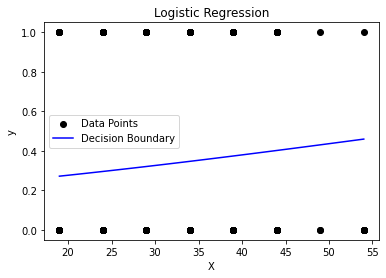

In [11]:
x_values = numpy.linspace(min(X), max(X), 100)
y_probabilities = lr_model.predict_proba(x_values.reshape(-1, 1))[:, 1]

plt.scatter(X, y, color='black', label='Data Points')
plt.plot(x_values, y_probabilities, color='blue', label='Decision Boundary')

plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.title('Logistic Regression')

plt.show()